In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Importing Classifier Modules
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#loading train dataset and checking missing values
df_train = pd.read_csv('Data for Cleaning & Modeling.csv')
df_train.info()

#loading test dataset
df_test=pd.read_csv('Holdout for Testing.csv')
df_train.info()
    

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

In [3]:
#loading metadata
meta=pd.read_csv('Metadata.csv',encoding= 'unicode_escape')
meta.head(32)

,Variable,Definition
0,X1,Interest Rate on the loan
1,X2,A unique id for the loan.
2,X3,A unique id assigned for the borrower.
3,X4,Loan amount requested
4,X5,Loan amount funded
5,X6,Investor-funded portion of loan
6,X7,Number of payments (36 or 60)
7,X8,Loan grade
8,X9,Loan subgrade
9,X10,Employer or job title (self-filled)


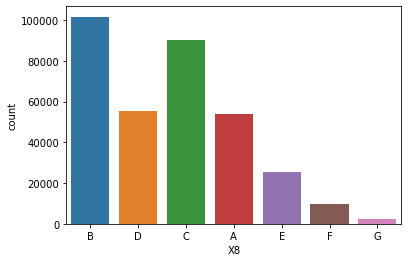

In [4]:
sns.countplot(x = 'X8', data = df_train)

In [5]:
#dropping rows from train data with missing interest rate
ind_missing = df_train[df_train['X1'].isnull()].index
df_lmr = df_train.drop(ind_missing, axis=0)
ind_missing = df_lmr[df_lmr['X8'].isnull()].index
df_lmr = df_lmr.drop(ind_missing, axis=0)
ind_missing = df_lmr[df_lmr['X9'].isnull()].index
df_lmr = df_lmr.drop(ind_missing, axis=0)
ind_missing = df_lmr[df_lmr['X13'].isnull()].index
df_lmr = df_lmr.drop(ind_missing, axis=0)
ind_missing =df_lmr[df_lmr['X30'].isnull()].index
df_lmr = df_lmr.drop(ind_missing, axis=0)
#dropping not useful colums !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!X17, X20-tate or x19 zip
df_lmr = df_lmr.drop(['X2','X3','X10','X11','X12','X15','X16','X18','X19','X23','X25','X26','X32'], axis=1)
df_lmr.reset_index(drop=True,inplace=True)

In [6]:

#dropping not useful colums and rows from test data 
ind_missing =df_test[df_test['X30'].isnull()].index
df_test_lmr = df_test.drop(ind_missing, axis=0)
df_test_lmr = df_test_lmr.drop(['X2','X3','X10','X11','X12','X15','X16','X18','X19','X23','X25','X26','X32'], axis=1)
df_test_lmr.reset_index(drop=True,inplace=True)

In [7]:
label_encoder=LabelEncoder()
train=df_lmr.copy()
train['X1'] = pd.to_numeric(train['X1'].str.replace('%', ''))
train['X4'] = train['X4'].str.replace('$', '')
train['X4'] = pd.to_numeric(train['X4'].str.replace(',', ''))
train['X5'] = train['X5'].str.replace('$', '')
train['X5'] = pd.to_numeric(train['X5'].str.replace(',', ''))
train['X6'] = train['X6'].str.replace('$', '')
train['X6'] = pd.to_numeric(train['X6'].str.replace(',', ''))
train['X7'] = pd.to_numeric(train['X7'].str.replace(' months', ''))
train['X8']=label_encoder.fit_transform(train['X8'])
train['X9']=label_encoder.fit_transform(train['X9'])
train['X14']=label_encoder.fit_transform(train['X14'])
train['X17']=label_encoder.fit_transform(train['X17'])
train['X20']=label_encoder.fit_transform(train['X20'])
train['X22'] = train['X22'].astype(int)
train['X24'] = train['X24'].astype(int) 
train['X27'] = train['X27'].astype(int)
train['X28'] = train['X28'].astype(int) 
train['X29'] = train['X29'].astype(int)
train['X30'] = pd.to_numeric(train['X30'].str.replace('%', ''))
train['X31'] = train['X31'].astype(int)
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242983 entries, 0 to 242982
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      242983 non-null  float64
 1   X4      242983 non-null  int64  
 2   X5      242983 non-null  int64  
 3   X6      242983 non-null  int64  
 4   X7      242983 non-null  int64  
 5   X8      242983 non-null  int64  
 6   X9      242983 non-null  int64  
 7   X13     242983 non-null  float64
 8   X14     242983 non-null  int64  
 9   X17     242983 non-null  int64  
 10  X20     242983 non-null  int64  
 11  X21     242983 non-null  float64
 12  X22     242983 non-null  int64  
 13  X24     242983 non-null  int64  
 14  X27     242983 non-null  int64  
 15  X28     242983 non-null  int64  
 16  X29     242983 non-null  int64  
 17  X30     242983 non-null  float64
 18  X31     242983 non-null  int64  
dtypes: float64(4), int64(15)
memory usage: 35.2 MB


,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X20,X21,X22,X24,X27,X28,X29,X30,X31
0,11.89,25000,25000,19080,36,1,8,85000.0,0,2,4,19.48,0,0,10,0,28854,52.1,42
1,10.71,7000,7000,673,36,1,9,65000.0,2,1,33,14.29,0,0,7,0,33623,76.7,7
2,16.99,25000,25000,24725,36,3,17,70000.0,0,2,33,10.50,0,0,10,0,19878,66.3,17
3,13.11,1200,1200,1200,36,2,11,54000.0,2,2,42,5.47,0,0,5,0,2584,40.4,31
4,13.57,10800,10800,10692,36,2,12,32000.0,2,2,6,11.63,0,1,14,0,3511,25.6,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242978,12.99,10000,10000,10000,60,2,10,50000.0,1,1,9,21.51,0,0,9,0,10268,76.1,20
242979,16.29,13150,13150,13150,36,3,16,30000.0,0,2,42,29.76,0,0,11,0,8931,37.8,21
242980,10.99,20000,20000,20000,60,1,7,99000.0,1,1,42,24.13,0,0,14,0,28976,69.3,48
242981,17.57,18475,18475,18475,60,3,18,42000.0,1,2,42,31.43,0,0,19,0,11982,39.0,31


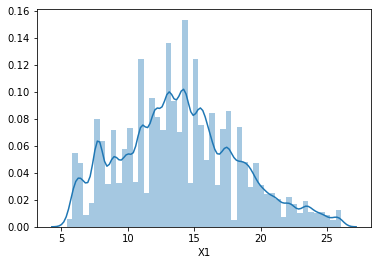

In [8]:
sns.distplot(train[train['X1'].notnull()]['X1'])

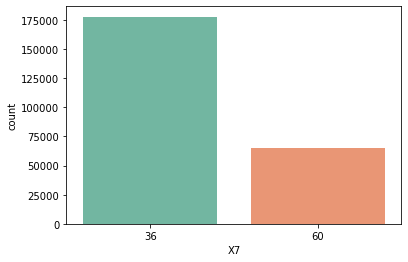

In [9]:
sns.countplot(x = 'X7', data = train, palette="Set2")

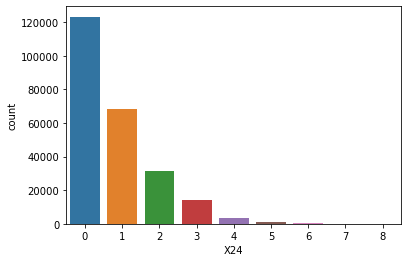

In [10]:
sns.countplot(x = 'X24', data = train)

In [11]:
test=df_test_lmr.copy()
test.info()
test['X4'] = test['X4'].str.replace('$', '')
test['X4'] = pd.to_numeric(test['X4'].str.replace(',', ''))
test['X5'] = test['X5'].str.replace('$', '')
test['X5'] = pd.to_numeric(test['X5'].str.replace(',', ''))
test['X6'] = test['X6'].str.replace('$', '')
test['X6'] = pd.to_numeric(test['X6'].str.replace(',', ''))
test['X7'] = pd.to_numeric(test['X7'].str.replace(' months', ''))
test['X8']=label_encoder.fit_transform(test['X8'].values)
test['X9']=label_encoder.fit_transform(test['X9'])
test['X14']=label_encoder.fit_transform(test['X14'])
test['X17']=label_encoder.fit_transform(test['X17'])
test['X20']=label_encoder.fit_transform(test['X20'])
test['X30'] = pd.to_numeric(test['X30'].str.replace('%', ''))
test['X30']=label_encoder.fit_transform(test['X30'])
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79970 entries, 0 to 79969
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X4      79970 non-null  object 
 2   X5      79970 non-null  object 
 3   X6      79970 non-null  object 
 4   X7      79970 non-null  object 
 5   X8      79970 non-null  object 
 6   X9      79970 non-null  object 
 7   X13     79970 non-null  float64
 8   X14     79970 non-null  object 
 9   X17     79970 non-null  object 
 10  X20     79970 non-null  object 
 11  X21     79970 non-null  float64
 12  X22     79970 non-null  int64  
 13  X24     79970 non-null  int64  
 14  X27     79970 non-null  int64  
 15  X28     79970 non-null  int64  
 16  X29     79970 non-null  int64  
 17  X30     79970 non-null  object 
 18  X31     79970 non-null  int64  
dtypes: float64(3), int64(6), object(10)
memory usage: 11.6+ MB


,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X20,X21,X22,X24,X27,X28,X29,X30,X31
0,NaN,6000,6000,6000,36,2,14,68000.0,0,2,30,28.31,0,1,18,0,19861,645,33
1,NaN,24000,24000,24000,36,0,0,110480.0,0,2,4,16.03,0,1,12,0,17001,262,36
2,NaN,35000,35000,35000,36,2,11,86000.0,0,2,33,32.49,0,0,16,0,25797,499,33
3,NaN,10000,10000,10000,60,3,15,30000.0,1,2,4,32.96,0,1,13,1,9586,438,21
4,NaN,24000,24000,24000,60,1,5,82500.0,0,2,33,31.03,0,0,27,0,31842,413,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79965,NaN,6400,6400,6400,36,0,1,50000.0,2,1,4,15.74,0,0,13,0,7185,479,15
79966,NaN,30000,30000,30000,60,4,21,92000.0,0,1,43,19.28,0,0,19,0,25151,513,38
79967,NaN,17600,17600,17600,36,3,18,70000.0,2,1,3,17.50,0,0,18,0,12161,371,36
79968,NaN,2500,2500,2500,36,2,11,80000.0,2,2,18,16.52,0,0,13,0,13031,767,23


In [12]:
X, y = train.drop(['X1'], axis = 1), train['X1']
X_test=test.drop(['X1'], axis = 1)

In [13]:
#Linear Regression
regressor = LinearRegression()
regressor.fit(X, y)
Y_pred = regressor.predict(X_test)
acc_linear_regression = round(regressor.score(X, y)*100, 3)
print(str(acc_linear_regression))

95.746


In [14]:
df_linear=df_test_lmr.copy()
df_linear['X1']=Y_pred
df_linear

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X20,X21,X22,X24,X27,X28,X29,X30,X31
0,19.301553,"$6,000","$6,000","$6,000",36 months,C,C5,68000.0,VERIFIED - income,debt_consolidation,OH,28.31,0,1,18,0,19861,64.50%,33
1,8.039574,"$24,000","$24,000","$24,000",36 months,A,A1,110480.0,VERIFIED - income,debt_consolidation,CA,16.03,0,1,12,0,17001,26.20%,36
2,16.524142,"$35,000","$35,000","$35,000",36 months,C,C2,86000.0,VERIFIED - income,debt_consolidation,PA,32.49,0,0,16,0,25797,49.90%,33
3,18.636982,"$10,000","$10,000","$10,000",60 months,D,D1,30000.0,VERIFIED - income source,debt_consolidation,CA,32.96,0,1,13,1,9586,43.80%,21
4,12.056992,"$24,000","$24,000","$24,000",60 months,B,B1,82500.0,VERIFIED - income,debt_consolidation,PA,31.03,0,0,27,0,31842,41.30%,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79965,9.701043,"$6,400","$6,400","$6,400",36 months,A,A2,50000.0,not verified,credit_card,CA,15.74,0,0,13,0,7185,47.90%,15
79966,22.886533,"$30,000","$30,000","$30,000",60 months,E,E2,92000.0,VERIFIED - income,credit_card,WI,19.28,0,0,19,0,25151,51.30%,38
79967,20.085053,"$17,600","$17,600","$17,600",36 months,D,D4,70000.0,not verified,credit_card,AZ,17.50,0,0,18,0,12161,37.10%,36
79968,17.684591,"$2,500","$2,500","$2,500",36 months,C,C2,80000.0,not verified,debt_consolidation,MD,16.52,0,0,13,0,13031,76.70%,23


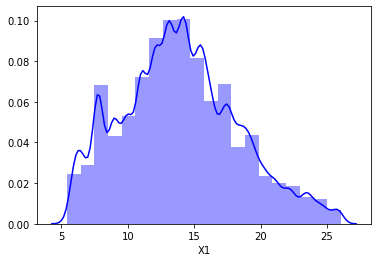

In [15]:
sns.distplot(train[train['X1'].notnull()]['X1'], color = 'b', bins = 20)

In [16]:
#Now to complete other we need to transform our data 
train['X1'] = (train['X1']*100).astype(int)
X, y = train.drop(['X1'], axis = 1), train['X1']
X_test=test.drop(['X1'], axis = 1)

In [17]:
#Decision Tree
decision_tree = DecisionTreeClassifier(criterion = 'entropy')
decision_tree.fit(X, y)
Y_pred = decision_tree.predict(X_test)
Y_pred=Y_pred/100
acc_decision_tree = round(decision_tree.score(X, y) * 100, 3)
print(str(acc_decision_tree))

100.0


In [18]:
df_dtree=df_test_lmr.copy()
df_dtree['X1']=Y_pred
df_dtree

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X20,X21,X22,X24,X27,X28,X29,X30,X31
0,16.78,"$6,000","$6,000","$6,000",36 months,C,C5,68000.0,VERIFIED - income,debt_consolidation,OH,28.31,0,1,18,0,19861,64.50%,33
1,6.03,"$24,000","$24,000","$24,000",36 months,A,A1,110480.0,VERIFIED - income,debt_consolidation,CA,16.03,0,1,12,0,17001,26.20%,36
2,14.33,"$35,000","$35,000","$35,000",36 months,C,C2,86000.0,VERIFIED - income,debt_consolidation,PA,32.49,0,0,16,0,25797,49.90%,33
3,15.61,"$10,000","$10,000","$10,000",60 months,D,D1,30000.0,VERIFIED - income source,debt_consolidation,CA,32.96,0,1,13,1,9586,43.80%,21
4,9.99,"$24,000","$24,000","$24,000",60 months,B,B1,82500.0,VERIFIED - income,debt_consolidation,PA,31.03,0,0,27,0,31842,41.30%,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79965,6.62,"$6,400","$6,400","$6,400",36 months,A,A2,50000.0,not verified,credit_card,CA,15.74,0,0,13,0,7185,47.90%,15
79966,21.00,"$30,000","$30,000","$30,000",60 months,E,E2,92000.0,VERIFIED - income,credit_card,WI,19.28,0,0,19,0,25151,51.30%,38
79967,19.05,"$17,600","$17,600","$17,600",36 months,D,D4,70000.0,not verified,credit_card,AZ,17.50,0,0,18,0,12161,37.10%,36
79968,13.35,"$2,500","$2,500","$2,500",36 months,C,C2,80000.0,not verified,debt_consolidation,MD,16.52,0,0,13,0,13031,76.70%,23


In [19]:
#Linear Regression
regressor = LinearRegression()
regressor.fit(X, y)
Y_pred = regressor.predict(X_test)
acc_linear_regression2= round(regressor.score(X, y)*100, 3)
print(str(acc_linear_regression2))

95.744


In [20]:
Y_pred=Y_pred/100
df_linear2=df_test_lmr.copy()
df_linear2['X1']=Y_pred
df_linear2

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X20,X21,X22,X24,X27,X28,X29,X30,X31
0,19.301569,"$6,000","$6,000","$6,000",36 months,C,C5,68000.0,VERIFIED - income,debt_consolidation,OH,28.31,0,1,18,0,19861,64.50%,33
1,8.039989,"$24,000","$24,000","$24,000",36 months,A,A1,110480.0,VERIFIED - income,debt_consolidation,CA,16.03,0,1,12,0,17001,26.20%,36
2,16.523932,"$35,000","$35,000","$35,000",36 months,C,C2,86000.0,VERIFIED - income,debt_consolidation,PA,32.49,0,0,16,0,25797,49.90%,33
3,18.636262,"$10,000","$10,000","$10,000",60 months,D,D1,30000.0,VERIFIED - income source,debt_consolidation,CA,32.96,0,1,13,1,9586,43.80%,21
4,12.057078,"$24,000","$24,000","$24,000",60 months,B,B1,82500.0,VERIFIED - income,debt_consolidation,PA,31.03,0,0,27,0,31842,41.30%,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79965,9.701603,"$6,400","$6,400","$6,400",36 months,A,A2,50000.0,not verified,credit_card,CA,15.74,0,0,13,0,7185,47.90%,15
79966,22.885653,"$30,000","$30,000","$30,000",60 months,E,E2,92000.0,VERIFIED - income,credit_card,WI,19.28,0,0,19,0,25151,51.30%,38
79967,20.084371,"$17,600","$17,600","$17,600",36 months,D,D4,70000.0,not verified,credit_card,AZ,17.50,0,0,18,0,12161,37.10%,36
79968,17.684663,"$2,500","$2,500","$2,500",36 months,C,C2,80000.0,not verified,debt_consolidation,MD,16.52,0,0,13,0,13031,76.70%,23


In [31]:
#Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)
y_ran_forest_pred = clf.predict(X_test)
acc_ran_forest = round(clf.score(X, y)*100, 3)
print(str(acc_ran_forest))

100.0


In [32]:
y_ran_forest_pred=y_ran_forest_pred/100
df_rf=df_test_lmr.copy()
df_rf['X1']=y_ran_forest_pred
df_rf

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X20,X21,X22,X24,X27,X28,X29,X30,X31
0,17.27,"$6,000","$6,000","$6,000",36 months,C,C5,68000.0,VERIFIED - income,debt_consolidation,OH,28.31,0,1,18,0,19861,64.50%,33
1,6.03,"$24,000","$24,000","$24,000",36 months,A,A1,110480.0,VERIFIED - income,debt_consolidation,CA,16.03,0,1,12,0,17001,26.20%,36
2,14.16,"$35,000","$35,000","$35,000",36 months,C,C2,86000.0,VERIFIED - income,debt_consolidation,PA,32.49,0,0,16,0,25797,49.90%,33
3,15.61,"$10,000","$10,000","$10,000",60 months,D,D1,30000.0,VERIFIED - income source,debt_consolidation,CA,32.96,0,1,13,1,9586,43.80%,21
4,10.16,"$24,000","$24,000","$24,000",60 months,B,B1,82500.0,VERIFIED - income,debt_consolidation,PA,31.03,0,0,27,0,31842,41.30%,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79965,6.49,"$6,400","$6,400","$6,400",36 months,A,A2,50000.0,not verified,credit_card,CA,15.74,0,0,13,0,7185,47.90%,15
79966,20.49,"$30,000","$30,000","$30,000",60 months,E,E2,92000.0,VERIFIED - income,credit_card,WI,19.28,0,0,19,0,25151,51.30%,38
79967,19.05,"$17,600","$17,600","$17,600",36 months,D,D4,70000.0,not verified,credit_card,AZ,17.50,0,0,18,0,12161,37.10%,36
79968,13.35,"$2,500","$2,500","$2,500",36 months,C,C2,80000.0,not verified,debt_consolidation,MD,16.52,0,0,13,0,13031,76.70%,23


In [23]:
#K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X, y) * 100, 3)
print(str(acc_knn))

34.8


In [24]:
Y_pred=Y_pred/100
df_KNN=df_test_lmr.copy()
df_KNN['X1']=Y_pred
df_KNN

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X20,X21,X22,X24,X27,X28,X29,X30,X31
0,10.25,"$6,000","$6,000","$6,000",36 months,C,C5,68000.0,VERIFIED - income,debt_consolidation,OH,28.31,0,1,18,0,19861,64.50%,33
1,11.55,"$24,000","$24,000","$24,000",36 months,A,A1,110480.0,VERIFIED - income,debt_consolidation,CA,16.03,0,1,12,0,17001,26.20%,36
2,13.98,"$35,000","$35,000","$35,000",36 months,C,C2,86000.0,VERIFIED - income,debt_consolidation,PA,32.49,0,0,16,0,25797,49.90%,33
3,7.90,"$10,000","$10,000","$10,000",60 months,D,D1,30000.0,VERIFIED - income source,debt_consolidation,CA,32.96,0,1,13,1,9586,43.80%,21
4,11.55,"$24,000","$24,000","$24,000",60 months,B,B1,82500.0,VERIFIED - income,debt_consolidation,PA,31.03,0,0,27,0,31842,41.30%,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79965,10.99,"$6,400","$6,400","$6,400",36 months,A,A2,50000.0,not verified,credit_card,CA,15.74,0,0,13,0,7185,47.90%,15
79966,14.99,"$30,000","$30,000","$30,000",60 months,E,E2,92000.0,VERIFIED - income,credit_card,WI,19.28,0,0,19,0,25151,51.30%,38
79967,8.39,"$17,600","$17,600","$17,600",36 months,D,D4,70000.0,not verified,credit_card,AZ,17.50,0,0,18,0,12161,37.10%,36
79968,11.49,"$2,500","$2,500","$2,500",36 months,C,C2,80000.0,not verified,debt_consolidation,MD,16.52,0,0,13,0,13031,76.70%,23


In [25]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X, y)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X, y) * 100, 3)
print(str(acc_gaussian))

12.257


In [26]:
Y_pred=Y_pred/100
df_GNB=df_test_lmr.copy()
df_GNB['X1']=Y_pred
df_GNB

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X20,X21,X22,X24,X27,X28,X29,X30,X31
0,18.53,"$6,000","$6,000","$6,000",36 months,C,C5,68000.0,VERIFIED - income,debt_consolidation,OH,28.31,0,1,18,0,19861,64.50%,33
1,11.63,"$24,000","$24,000","$24,000",36 months,A,A1,110480.0,VERIFIED - income,debt_consolidation,CA,16.03,0,1,12,0,17001,26.20%,36
2,18.53,"$35,000","$35,000","$35,000",36 months,C,C2,86000.0,VERIFIED - income,debt_consolidation,PA,32.49,0,0,16,0,25797,49.90%,33
3,12.62,"$10,000","$10,000","$10,000",60 months,D,D1,30000.0,VERIFIED - income source,debt_consolidation,CA,32.96,0,1,13,1,9586,43.80%,21
4,13.66,"$24,000","$24,000","$24,000",60 months,B,B1,82500.0,VERIFIED - income,debt_consolidation,PA,31.03,0,0,27,0,31842,41.30%,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79965,12.62,"$6,400","$6,400","$6,400",36 months,A,A2,50000.0,not verified,credit_card,CA,15.74,0,0,13,0,7185,47.90%,15
79966,20.16,"$30,000","$30,000","$30,000",60 months,E,E2,92000.0,VERIFIED - income,credit_card,WI,19.28,0,0,19,0,25151,51.30%,38
79967,18.53,"$17,600","$17,600","$17,600",36 months,D,D4,70000.0,not verified,credit_card,AZ,17.50,0,0,18,0,12161,37.10%,36
79968,18.53,"$2,500","$2,500","$2,500",36 months,C,C2,80000.0,not verified,debt_consolidation,MD,16.52,0,0,13,0,13031,76.70%,23


In [27]:
#Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X, y)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X, y) * 100, 2)
print(str(acc_perceptron))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.91


In [28]:
Y_pred=Y_pred/100
df_Perc=df_test_lmr.copy()
df_Perc['X1']=Y_pred
df_Perc

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X20,X21,X22,X24,X27,X28,X29,X30,X31
0,7.69,"$6,000","$6,000","$6,000",36 months,C,C5,68000.0,VERIFIED - income,debt_consolidation,OH,28.31,0,1,18,0,19861,64.50%,33
1,12.68,"$24,000","$24,000","$24,000",36 months,A,A1,110480.0,VERIFIED - income,debt_consolidation,CA,16.03,0,1,12,0,17001,26.20%,36
2,14.61,"$35,000","$35,000","$35,000",36 months,C,C2,86000.0,VERIFIED - income,debt_consolidation,PA,32.49,0,0,16,0,25797,49.90%,33
3,12.68,"$10,000","$10,000","$10,000",60 months,D,D1,30000.0,VERIFIED - income source,debt_consolidation,CA,32.96,0,1,13,1,9586,43.80%,21
4,12.68,"$24,000","$24,000","$24,000",60 months,B,B1,82500.0,VERIFIED - income,debt_consolidation,PA,31.03,0,0,27,0,31842,41.30%,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79965,7.69,"$6,400","$6,400","$6,400",36 months,A,A2,50000.0,not verified,credit_card,CA,15.74,0,0,13,0,7185,47.90%,15
79966,12.68,"$30,000","$30,000","$30,000",60 months,E,E2,92000.0,VERIFIED - income,credit_card,WI,19.28,0,0,19,0,25151,51.30%,38
79967,16.29,"$17,600","$17,600","$17,600",36 months,D,D4,70000.0,not verified,credit_card,AZ,17.50,0,0,18,0,12161,37.10%,36
79968,7.69,"$2,500","$2,500","$2,500",36 months,C,C2,80000.0,not verified,debt_consolidation,MD,16.52,0,0,13,0,13031,76.70%,23


In [29]:
results = pd.DataFrame({
    'Model': ['Linear Regression1',
              'Decision Tree', 'Linear Regression2','Random Forest','KNN','Naive Bayes','Perceptron'],
    'Score': [acc_linear_regression,acc_decision_tree,acc_linear_regression2,acc_ran_forest, acc_knn, acc_gaussian,acc_perceptron,]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.000,Decision Tree
100.000,Random Forest
95.746,Linear Regression1
95.744,Linear Regression2
34.800,KNN
12.257,Naive Bayes
0.910,Perceptron


In [33]:
#Thus Random forest shows better accuracy
df_rf.to_csv("Results from Aliev Bekhzod.csv",index=False)

In [ ]:
# As we can see, Decision Tree, Random Forest and Linear Regression showed the best results.
# Also KNN, Naive Bayes and Perceptron have worst results. 
# I think we can not use KNN, Naive Bayes, Perceptron because they are mainly used in classifications problems.
# I used integer type to feed in the model, because in the datasets we use ,XX numbers, so I multiplied to 100
# To use them as labels.